# **Étape 1 : Importation des bibliothèques et chargement des données**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Maternal_Risk.csv')
data.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# **Étape 2 : Exploration des données**

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          808 non-null    int64  
 1   SystolicBP   808 non-null    int64  
 2   DiastolicBP  808 non-null    int64  
 3   BS           808 non-null    float64
 4   BodyTemp     808 non-null    float64
 5   HeartRate    808 non-null    int64  
 6   RiskLevel    808 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 44.3+ KB


In [4]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,30.585396,112.972772,77.500000,9.264839,98.640347,74.297030
std,13.922075,19.924312,14.772207,3.617635,1.386501,8.822686
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,7.000000,98.000000,70.000000
50%,27.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,40.000000,120.000000,90.000000,11.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [5]:
data.shape

(808, 7)

# **Étape 3 : Prétraitement des données**

In [6]:
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
data.duplicated().sum()

463

In [8]:
for col in data.columns:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in Age: [25 35 29 30 23 42 15 50 10 40 21 18 16 19 22 49 28 20 12 60 55 45 32 48
 34 38 39 63 54 14 37 17 24 31 27 13 59 33 43 41 46 51 62 65 66 56 70 36]
Unique values in SystolicBP: [130 140  90 120  85 110  70 100  75  95  76  80 135 160  99  78  83 129]
Unique values in DiastolicBP: [ 80  90  70  85  60  89 100  50  65  75  95  49  76  68  63  69]
Unique values in BS: [15.   13.    8.    7.    6.1   7.01 11.   18.    6.9   7.5   7.2   7.1
  6.7   6.4   6.8   7.9  17.    9.   19.   16.    6.    6.5  12.    6.6
  7.6  10.    7.7   6.3   7.8 ]
Unique values in BodyTemp: [ 98.  100.  102.  101.   99.   98.4 103.   98.6]
Unique values in HeartRate: [86 70 80 76 77 90 66 82 88 60 75 78  7 67 65]
Unique values in RiskLevel: ['high risk' 'low risk']


In [9]:
data_clean = data.drop_duplicates()

In [10]:
data_clean.shape

(345, 7)

In [11]:
data_clean.duplicated().sum()

0

In [12]:
le = LabelEncoder()
data['RiskLevel_encoded'] = le.fit_transform(data['RiskLevel'])
data_label = data.drop(columns=['RiskLevel'])

In [13]:
corr = data_label.corr()
corr

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_encoded
Age,1.000000,0.459576,0.440481,0.470890,-0.293673,0.093484,-0.319189
SystolicBP,0.459576,1.000000,0.866559,0.487461,-0.303682,0.028800,-0.434097
DiastolicBP,0.440481,0.866559,1.000000,0.438310,-0.287651,0.025101,-0.403863
BS,0.470890,0.487461,0.438310,1.000000,-0.124890,0.172422,-0.664571
BodyTemp,-0.293673,-0.303682,-0.287651,-0.124890,1.000000,0.021143,-0.189497
HeartRate,0.093484,0.028800,0.025101,0.172422,0.021143,1.000000,-0.212165
RiskLevel_encoded,-0.319189,-0.434097,-0.403863,-0.664571,-0.189497,-0.212165,1.000000


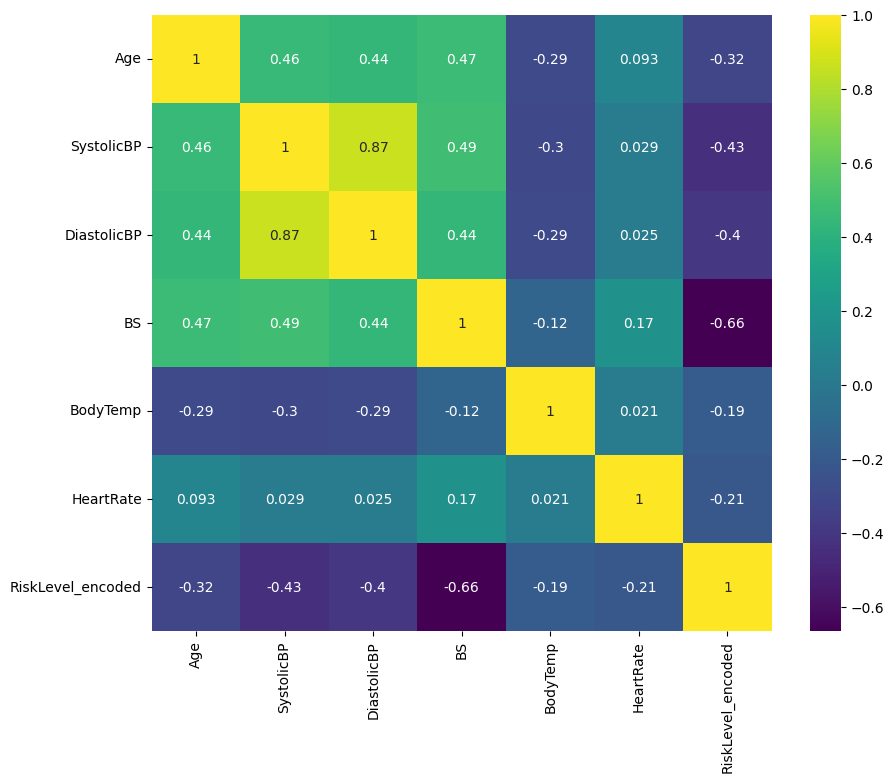

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis')

# Display the heatmap
plt.show()

# **Étape 4 : Détection des outliers et gestion des valeurs aberrantes**

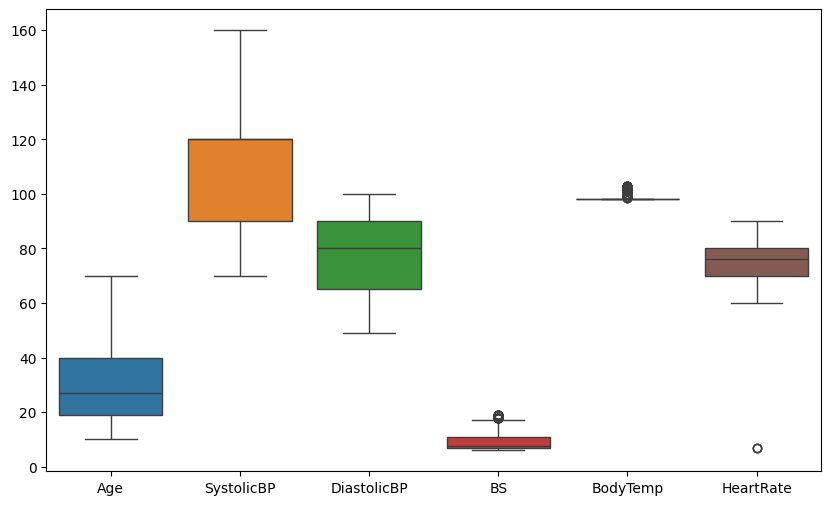

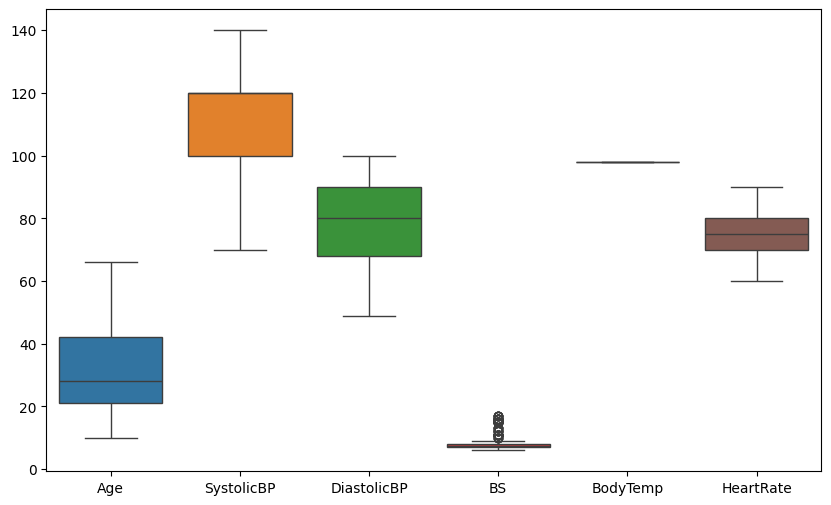

In [15]:
# Create boxplot excluding the 'RiskLevel' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(columns=['RiskLevel_encoded']))

# Display the boxplot
plt.show()
def remove_outliers(data, threshold=1.5):
    """Filtrer les outliers en utilisant la règle 1.5 * IQR."""
    data_filtered = data.copy()
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Garder seulement les valeurs non aberrantes
        data_filtered = data_filtered[
            (data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)
        ]
    
    return data_filtered

# Supprimer les outliers
data_no_outliers = remove_outliers(data.drop(columns=['RiskLevel_encoded']))

# Créer le boxplot sans outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_no_outliers)

# Afficher le boxplot
plt.show()



# **Étape 5 : Traitement des valeurs spécifiques**

In [16]:
# Afficher la distribution des âges inférieurs à 18 ans
ages_under_18 = data[data['Age'] < 18]['Age']
print(ages_under_18.value_counts())


15    66
17    59
12    27
16    13
13     7
14     3
10     2
Name: Age, dtype: int64


In [17]:
# Calculer la moyenne de la colonne Age
age_mean = data['Age'].mean()

# Remplacer les âges inférieurs à 18 ans par la moyenne
data['Age'] = data['Age'].apply(lambda x: age_mean if x < 18 else x)

# Vérifier si les âges ont été remplacés
print(data['Age'].head())


0    25.0
1    35.0
2    29.0
3    30.0
4    35.0
Name: Age, dtype: float64


# **Étape 6 : Analyse et visualisation des risques**

In [18]:
# Ajouter la colonne 'RiskLevel' au DataFrame (exemple : à partir d'une autre source ou colonne calculée)
data['RiskLevel'] = data['RiskLevel_encoded']

# Afficher les premières lignes du DataFrame
data.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,RiskLevel_encoded
0,25.0,130,80,15.0,98.0,86,0,0
1,35.0,140,90,13.0,98.0,70,0,0
2,29.0,90,70,8.0,100.0,80,0,0
3,30.0,140,85,7.0,98.0,70,0,0
4,35.0,120,60,6.1,98.0,76,1,1


In [19]:
data = data.drop('RiskLevel_encoded',axis=True)
data.head(5)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130,80,15.0,98.0,86,0
1,35.0,140,90,13.0,98.0,70,0
2,29.0,90,70,8.0,100.0,80,0
3,30.0,140,85,7.0,98.0,70,0
4,35.0,120,60,6.1,98.0,76,1


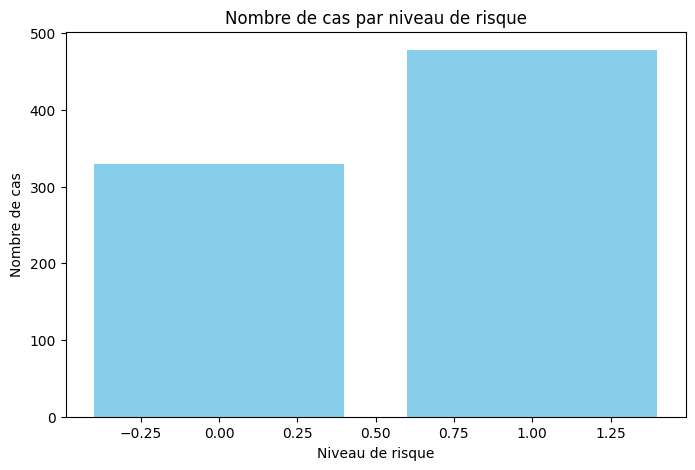

In [20]:
# Compter le nombre de cas pour chaque niveau de risque
risk_counts = data['RiskLevel'].value_counts()

# Créer un diagramme à barres
plt.figure(figsize=(8, 5))
plt.bar(risk_counts.index, risk_counts.values, color='skyblue')
plt.xlabel('Niveau de risque')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas par niveau de risque')
plt.show()

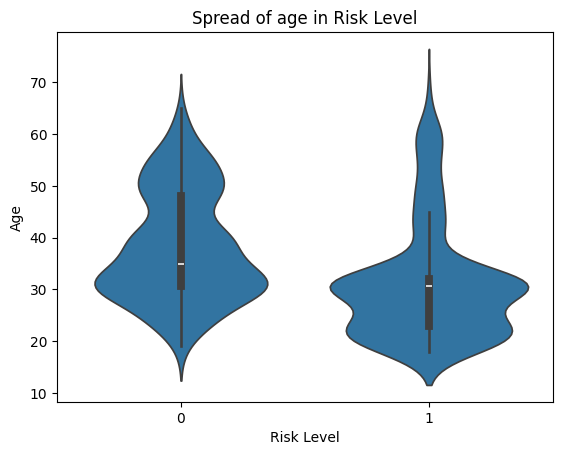

In [21]:
sns.violinplot(x="RiskLevel", y="Age", data=data)
plt.xlabel('Risk Level')
plt.ylabel('Age')
plt.title('Spread of age in Risk Level')
plt.show()


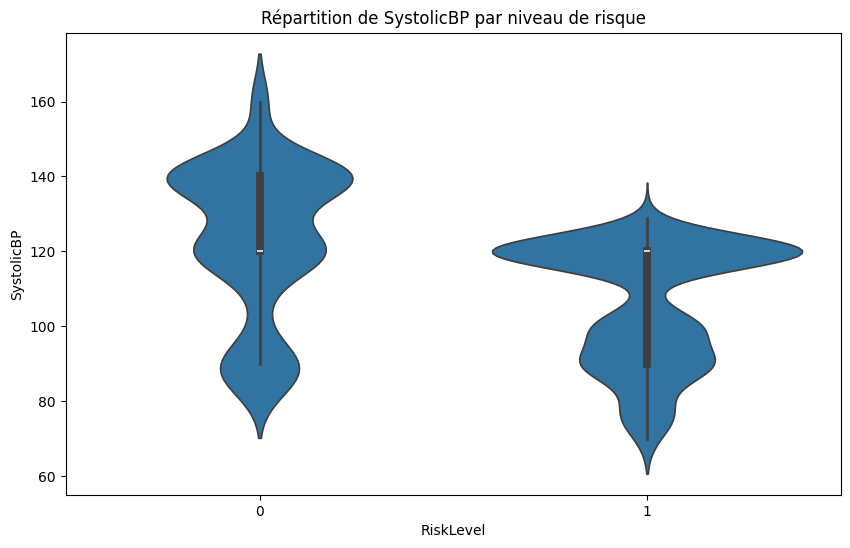

In [22]:
# Créer un violinplot pour la répartition des valeurs de SystolicBP par niveau de risque
plt.figure(figsize=(10, 6))
sns.violinplot(x='RiskLevel', y='SystolicBP', data=data)
plt.title('Répartition de SystolicBP par niveau de risque')
plt.show()


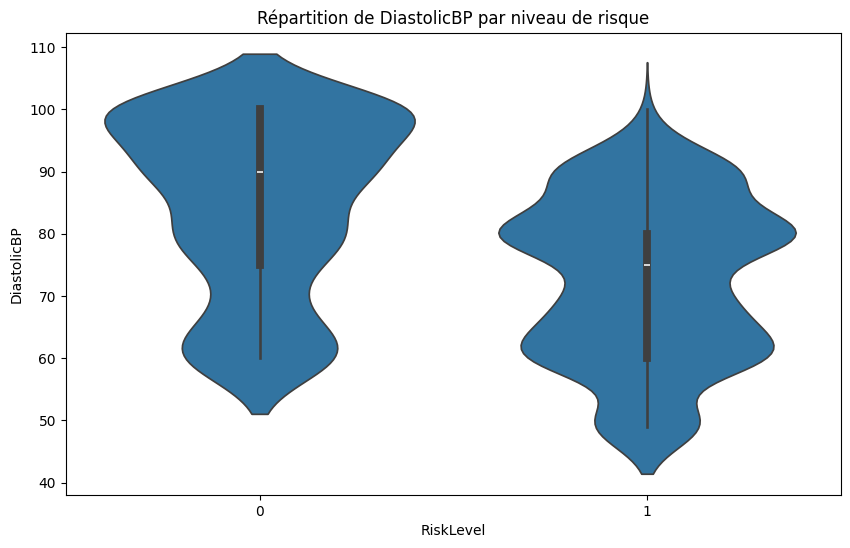

In [23]:
# Créer un violinplot pour la répartition des valeurs de DiastolicBP par niveau de risque
plt.figure(figsize=(10, 6))
sns.violinplot(x='RiskLevel', y='DiastolicBP', data=data)
plt.title('Répartition de DiastolicBP par niveau de risque')
plt.show()


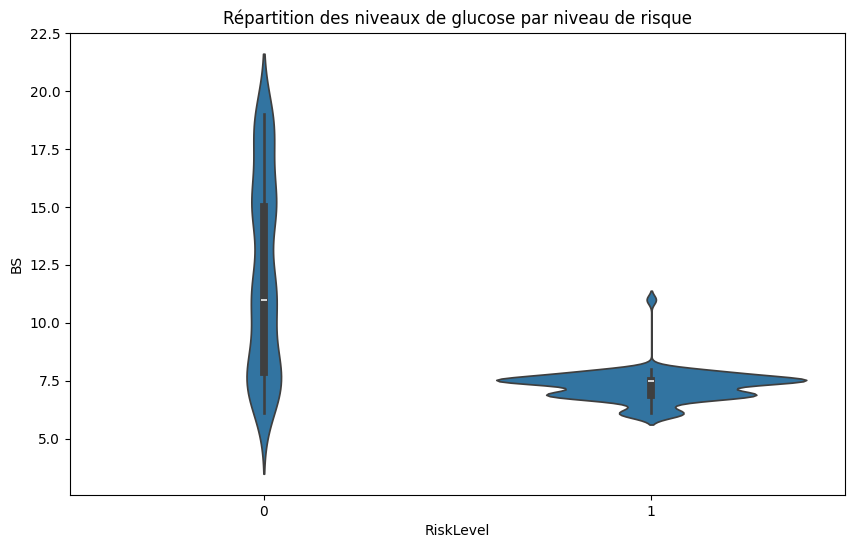

In [24]:
# Créer un violinplot pour la répartition des niveaux de glucose par niveau de risque
plt.figure(figsize=(10, 6))
sns.violinplot(x='RiskLevel', y='BS', data=data)
plt.title('Répartition des niveaux de glucose par niveau de risque')
plt.show()


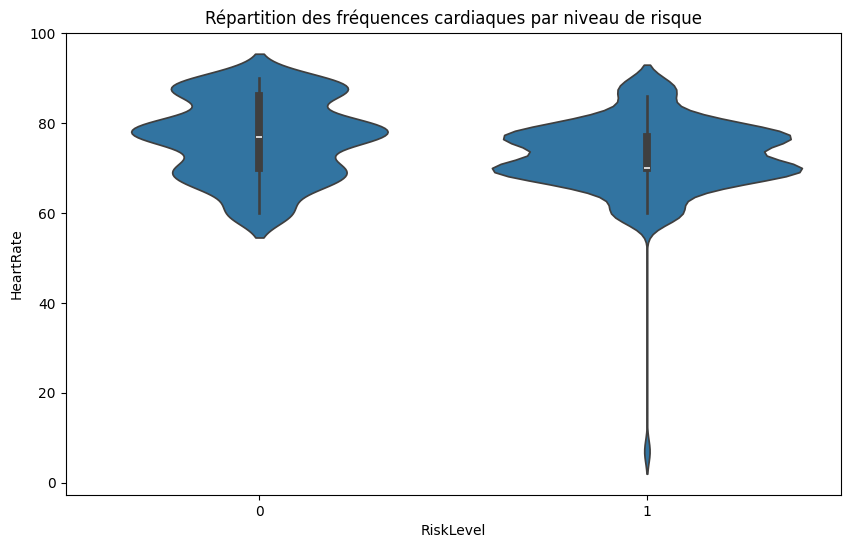

In [25]:
# Créer un violinplot pour la répartition des fréquences cardiaques par niveau de risque
plt.figure(figsize=(10, 6))
sns.violinplot(x='RiskLevel', y='HeartRate', data=data)
plt.title('Répartition des fréquences cardiaques par niveau de risque')
plt.show()


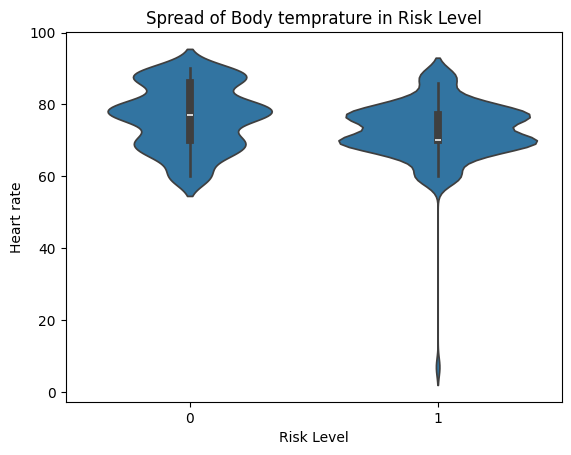

In [26]:
sns.violinplot(x="RiskLevel", y="HeartRate", data=data)
plt.xlabel('Risk Level')
plt.ylabel('Heart rate')
plt.title('Spread of Body temprature in Risk Level')
plt.show()

# **Étape 7 : Analyse univariée des risques**

In [27]:
# Créer un DataFrame contenant uniquement les cas "high risk"
data_highrisk = data[data['RiskLevel'] == 1]

# Afficher les premières lignes de data_highrisk
data_highrisk.head()



,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
4,35.000000,120,60,6.10,98.0,76,1
8,23.000000,90,60,7.01,98.0,76,1
10,25.000000,110,89,7.01,98.0,77,1
11,30.585396,120,80,7.01,98.0,70,1
14,30.585396,70,50,6.90,98.0,70,1


In [28]:
# Créer un DataFrame contenant uniquement les cas "low risk"
data_lowrisk = data[data['RiskLevel'] == 0]

# Afficher les premières lignes de data_lowrisk

data_lowrisk.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130,80,15.00,98.0,86,0
1,35.0,140,90,13.00,98.0,70,0
2,29.0,90,70,8.00,100.0,80,0
3,30.0,140,85,7.00,98.0,70,0
5,23.0,140,80,7.01,98.0,70,0


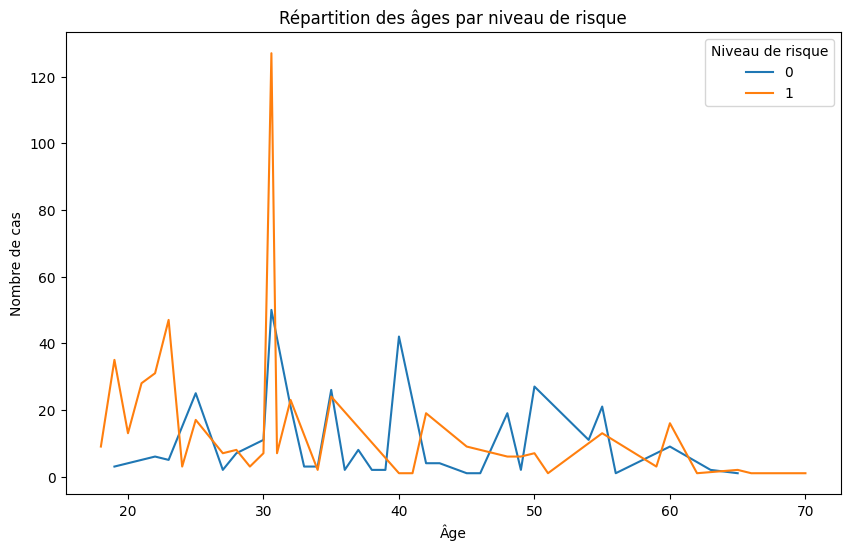

In [29]:

import matplotlib.pyplot as plt

# Grouper les âges par niveau de risque
age_distribution = data.groupby('RiskLevel')['Age'].value_counts().sort_index()

# Tracer la distribution des âges par niveau de risque
plt.figure(figsize=(10, 6))

for risk_level in data['RiskLevel'].unique():
    ages = age_distribution[risk_level]
    plt.plot(ages.index, ages.values, label=risk_level)

# Ajouter des légendes et un titre
plt.xlabel('Âge')
plt.ylabel('Nombre de cas')
plt.title('Répartition des âges par niveau de risque')
plt.legend(title='Niveau de risque')
plt.show()


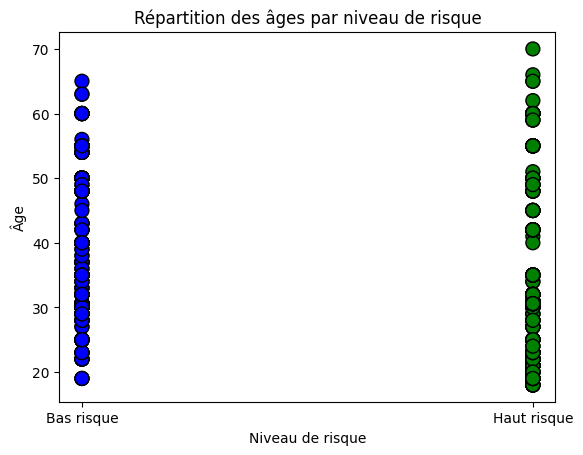

In [30]:
# Répartition des âges par niveau de risque avec plt.plot() et points colorés
plt.scatter(data['RiskLevel'], data['Age'], c=data['RiskLevel'].map({0: 'blue', 1: 'green'}), s=100, edgecolor='black')
plt.xlabel('Niveau de risque')
plt.ylabel('Âge')
plt.title('Répartition des âges par niveau de risque')
plt.xticks([0, 1], ['Bas risque', 'Haut risque'])
plt.show()


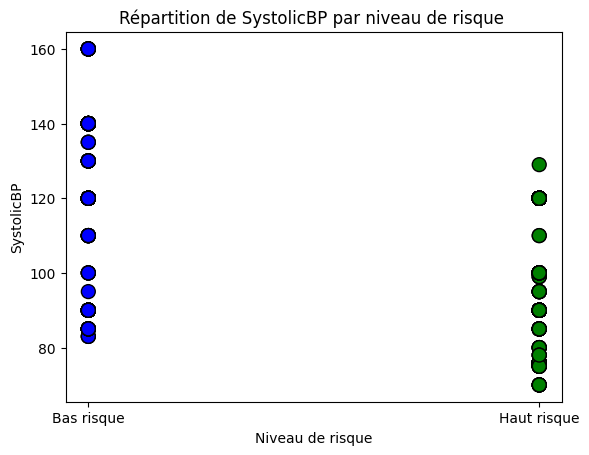

In [31]:
# Répartition de SystolicBP par niveau de risque avec plt.plot() et points colorés
plt.scatter(data['RiskLevel'], data['SystolicBP'], c=data['RiskLevel'].map({0: 'blue', 1: 'green'}), s=100, edgecolor='black')
plt.xlabel('Niveau de risque')
plt.ylabel('SystolicBP')
plt.title('Répartition de SystolicBP par niveau de risque ')
plt.xticks([0, 1], ['Bas risque', 'Haut risque'])
plt.show()


# **Étape 8 : Visualisation de la distribution des variables**

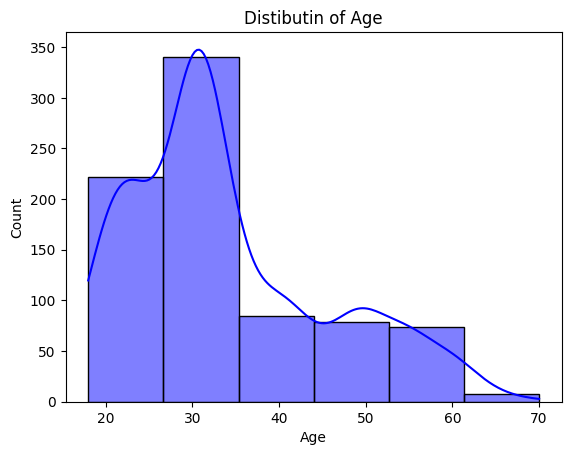

In [32]:
sns.histplot(data['Age'], bins=6, kde=True, color='blue', edgecolor='k')
plt.title('Distibutin of Age')
plt.show()

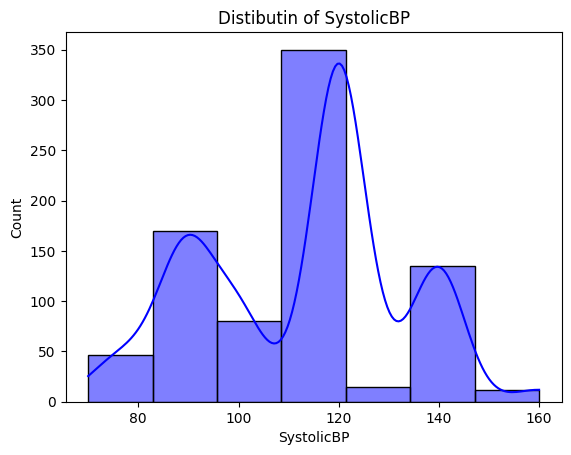

In [33]:
sns.histplot(data['SystolicBP'], bins=7, kde=True, color='blue', edgecolor='k')
plt.title('Distibutin of SystolicBP')
plt.show()

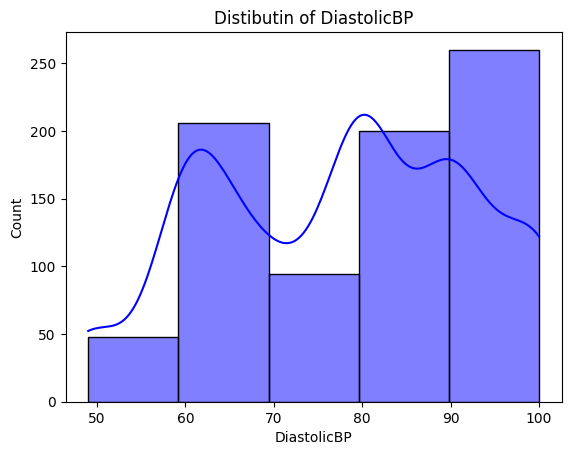

In [34]:
sns.histplot(data['DiastolicBP'], bins=5, kde=True, color='blue', edgecolor='k')
plt.title('Distibutin of DiastolicBP')
plt.show()

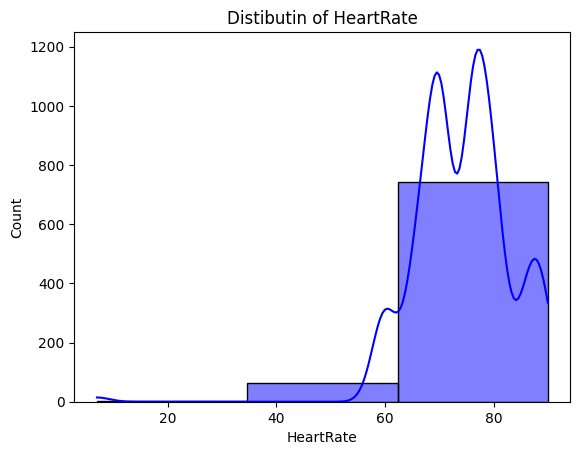

In [35]:
sns.histplot(data['HeartRate'], bins=3, kde=True, color='blue', edgecolor='k')
plt.title('Distibutin of HeartRate')
plt.show()

# **Étape 9 : Analyse bivariée des relations**

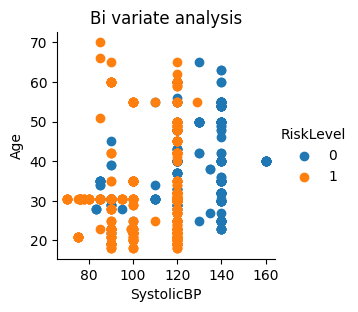

In [36]:
sns.FacetGrid(data, hue = "RiskLevel").map(plt.scatter , "SystolicBP" , "Age" ).add_legend();
plt.title('Bi variate analysis')
plt.show()

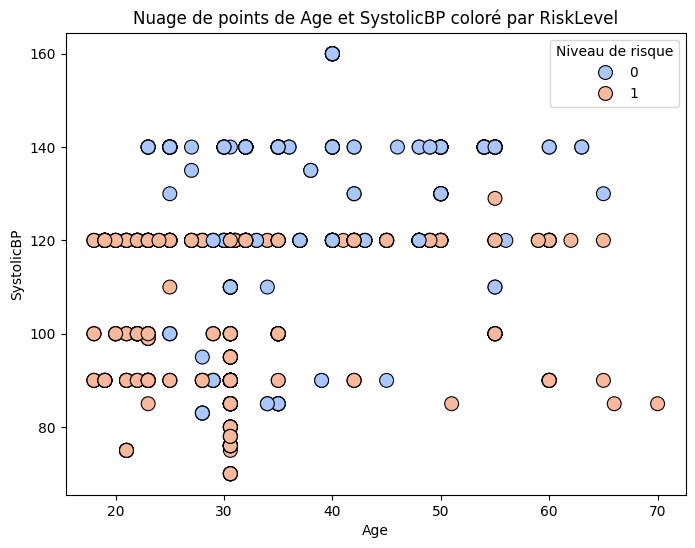

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer le scatter plot avec la coloration par niveau de risque
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='SystolicBP', hue='RiskLevel', data=data, palette='coolwarm', s=100, edgecolor='black')

# Ajouter les étiquettes et le titre
plt.xlabel('Age')
plt.ylabel('SystolicBP')
plt.title('Nuage de points de Age et SystolicBP coloré par RiskLevel')
plt.legend(title='Niveau de risque')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


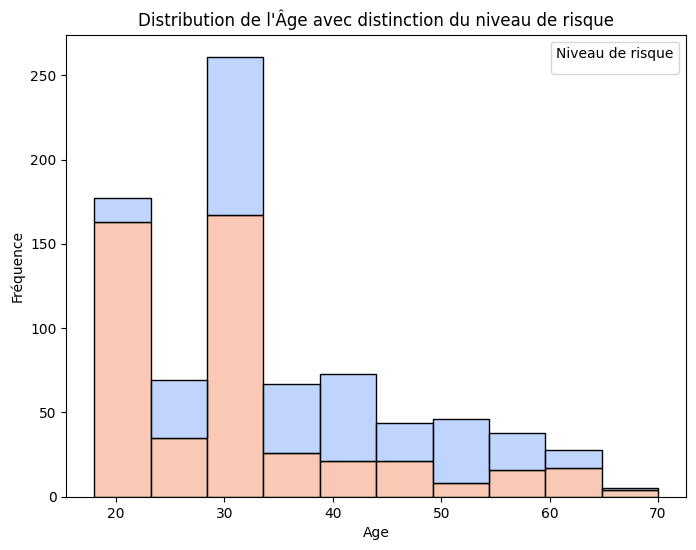

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer l'histogramme avec la distinction par niveau de risque
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='RiskLevel', multiple='stack', palette='coolwarm', bins=10)

# Ajouter les étiquettes et le titre
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.title('Distribution de l\'Âge avec distinction du niveau de risque')
plt.legend(title='Niveau de risque')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


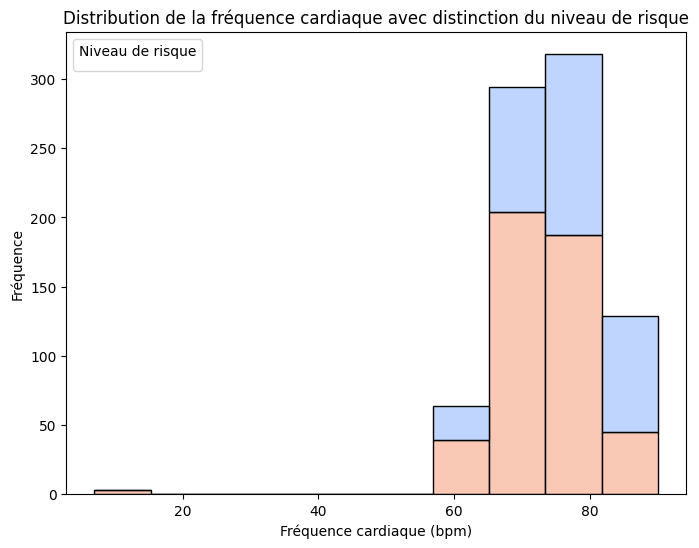

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='HeartRate', hue='RiskLevel', multiple='stack', palette='coolwarm', bins=10)

plt.xlabel('Fréquence cardiaque (bpm)')
plt.ylabel('Fréquence')
plt.title('Distribution de la fréquence cardiaque avec distinction du niveau de risque')
plt.legend(title='Niveau de risque')
plt.show()

# **Étape 10 : Analyse multivariée des relations**

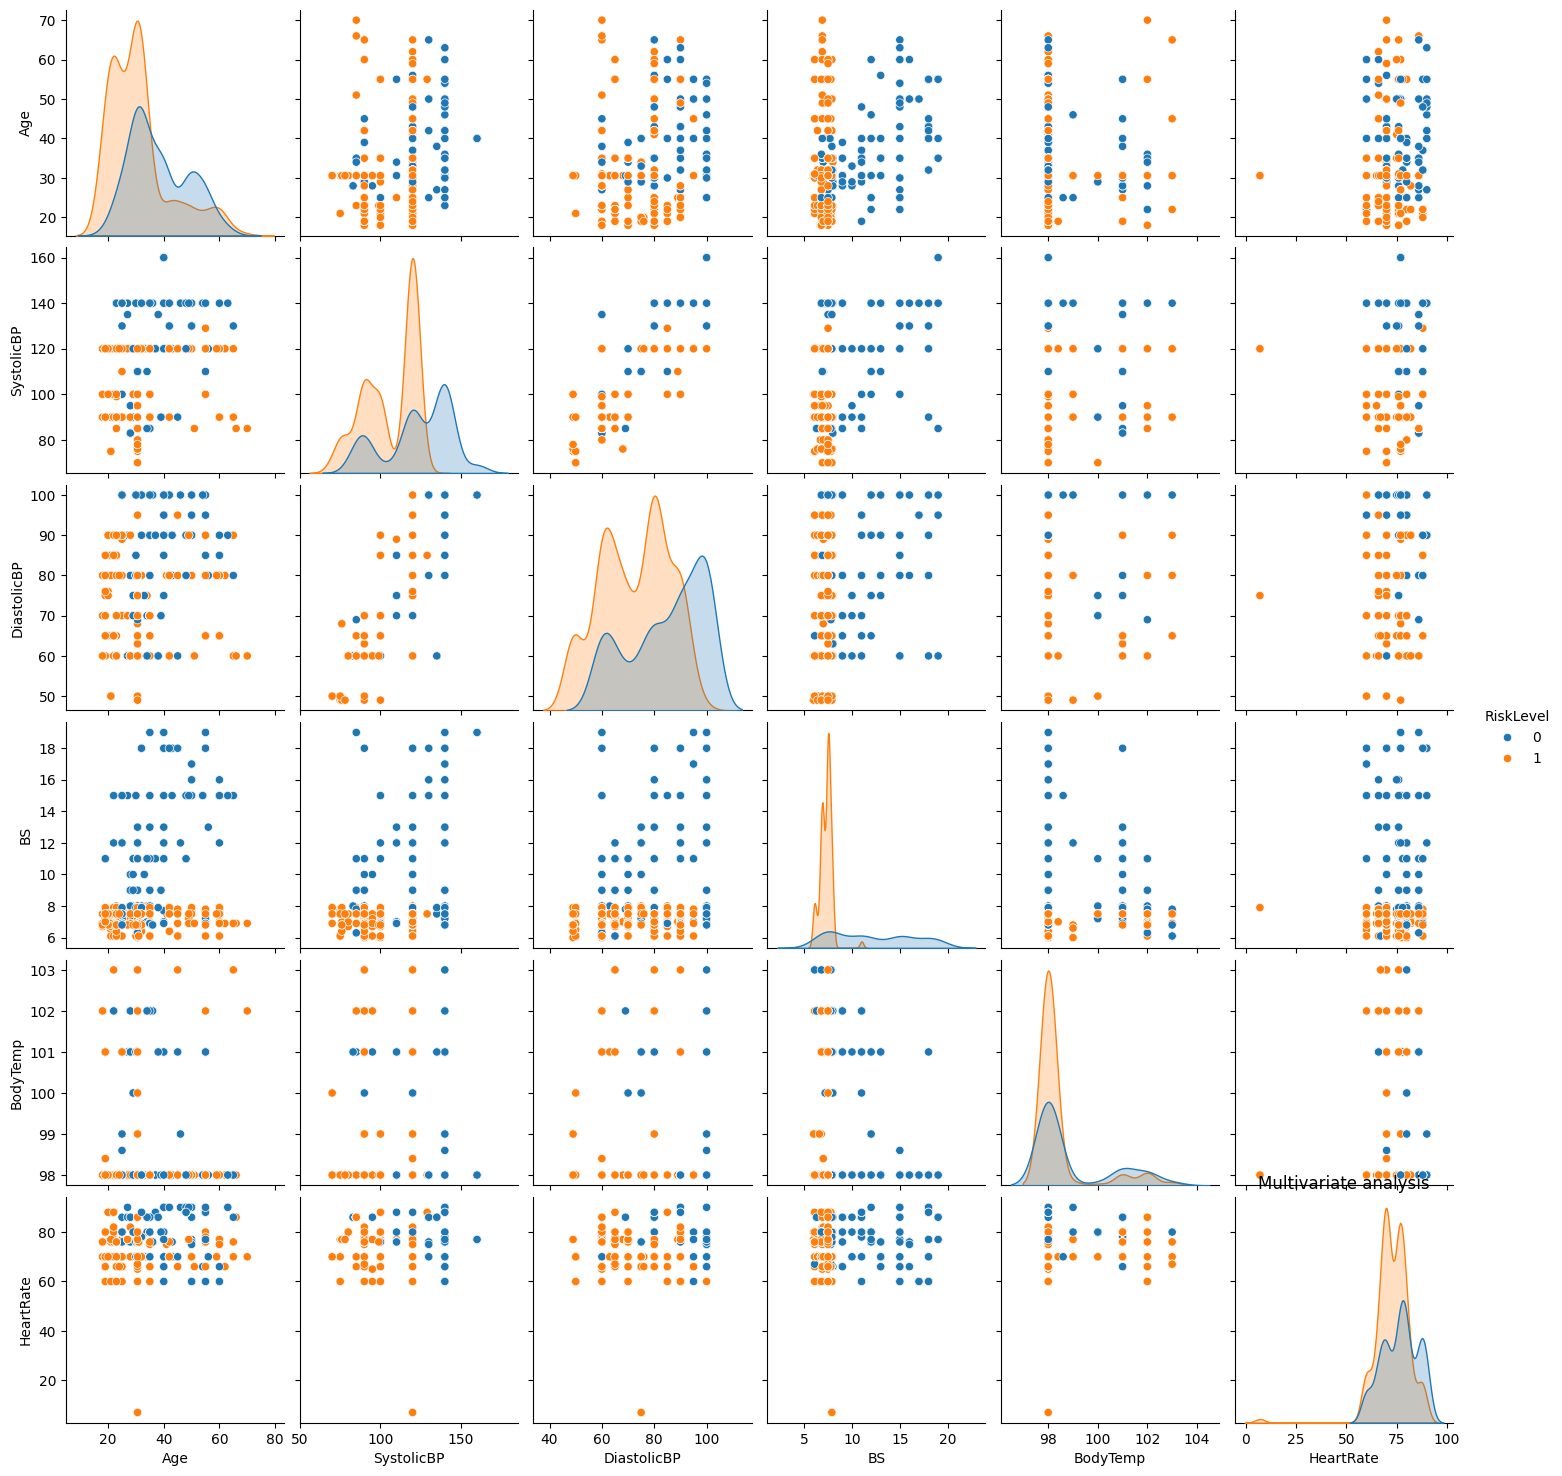

In [40]:
sns.pairplot(data , hue = 'RiskLevel')
plt.title('Multivariate analysis')
plt.show()

# **Étape 11 : Classification des cas**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [42]:
# Supposons que X contient les caractéristiques et y la variable cible (RiskLevel)
X = data.drop('RiskLevel', axis=1)  # Exclure la colonne RiskLevel pour X
y = data['RiskLevel']  # Cible

In [43]:
# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imprimer la forme de X_train, X_test, y_train, y_test
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (565, 6)
X_test shape: (243, 6)
y_train shape: (565,)
y_test shape: (243,)


In [44]:

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)


Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       104
           1       0.99      0.95      0.97       139

    accuracy                           0.97       243
   macro avg       0.96      0.97      0.97       243
weighted avg       0.97      0.97      0.97       243



In [45]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

report_rf = classification_report(y_test, y_pred_rf)
print('Random Forest Classification Report:\n', report_rf)


Random Forest Accuracy: 0.97
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       0.99      0.96      0.97       139

    accuracy                           0.97       243
   macro avg       0.96      0.97      0.97       243
weighted avg       0.97      0.97      0.97       243



In [46]:

svc_classifier = SVC(random_state=42)
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'SVC Accuracy: {accuracy_svc:.2f}')

report_svc = classification_report(y_test, y_pred_svc)
print('SVC Classification Report:\n', report_svc)


SVC Accuracy: 0.87
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.72      0.83       104
           1       0.83      0.99      0.90       139

    accuracy                           0.87       243
   macro avg       0.90      0.85      0.86       243
weighted avg       0.89      0.87      0.87       243



In [47]:
knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNeighbors Accuracy: {accuracy_knn:.2f}')

report_knn = classification_report(y_test, y_pred_knn)
print('KNeighbors Classification Report:\n', report_knn)


KNeighbors Accuracy: 0.88
KNeighbors Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       104
           1       0.91      0.89      0.90       139

    accuracy                           0.88       243
   macro avg       0.88      0.88      0.88       243
weighted avg       0.89      0.88      0.88       243

